Импортируем необходимые библиотеки

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# **Предобработка данных**

# Кассифиактор ортопедических изделий (classifier)

Открываем файл с классификатором

In [ ]:
classifier = pd.read_excel('classifier.xlsx', sheet_name='НАИМЕНОВАНИЯ')
classifier = classifier.rename(columns={'Поставщик': 'provider', 'Наименование товара': 'name', 'Код ГЕС': 'code', 'группа': 'group', 'подгруппа': 'subgroup', 'артикул': 'article'})
classifier.head()

,provider,name,code,group,subgroup,article
0,Ортопедия (Атлетика),fosta бандаж до/послеродовый на сетчатой основ...,26228703,бандажи,Бандаж до- и послеродовый,7651
1,Ортопедия (Атлетика),fosta бандаж до/послеродовый на сетчатой основ...,316211,бандажи,Бандаж до- и послеродовый,7651
2,Ортопедия (Атлетика),fosta бандаж до/послеродовый на сетчатой основ...,25458403,бандажи,Бандаж до- и послеродовый,7651
3,Ортопедия (Атлетика),fosta бандаж до/послеродовый на сетчатой основ...,25458303,бандажи,Бандаж до- и послеродовый,7651
4,Ортопедия (Атлетика),fosta бандаж до/послеродовый р.l 7651,1565599,бандажи,Бандаж до- и послеродовый,7651


Смотрим тип данных и наличие пропусков

In [ ]:
classifier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5996 entries, 0 to 5995
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   provider  5996 non-null   object
 1   name      5996 non-null   object
 2   code      5996 non-null   int64 
 3   group     5996 non-null   object
 4   subgroup  5996 non-null   object
 5   article   5996 non-null   object
dtypes: int64(1), object(5)
memory usage: 281.2+ KB


При первичном осмотре данных видно, что названия групп и подгрупп, артикулы могут быть написаны в разном регистре или имеют пробелы в начале и конце строки. Это не позволит сделать корректный свод, поэтому исправим это  

In [ ]:
def correct_names(name):
  """
  Функция преобразует в нижний регистр и убирает пробелы в начале и конце строки
  """
  if type(name) == str:
    return name.lower().strip()
  else: return name 

In [ ]:
classifier['group'] = classifier['group'].apply(correct_names)
classifier['subgroup'] = classifier['subgroup'].apply(correct_names)
classifier['article'] = classifier['article'].apply(correct_names)

Смотрим, какие группы и подгруппы есть в классификаторе 

In [ ]:
classifier.groupby(['group', 'subgroup']).count()

provider  name  \
group                    subgroup                                             
бандажи                  бандаж до- и послеродовый                138   138   
                         бандаж послеоперационный                 247   247   
                         бандаж при опущении                       80    80   
                         бандаж противогрыжевой                    55    55   
                         бандаж противогрыжевой-паховый            66    66   
изделия для позвоночника бандаж ключичный                           4     4   
                         бандаж пояснично-крестцовый              356   356   
                         бандаж противорадикулитный                60    60   
                         бандаж шейный                            188   188   
                         корректор осанки                         257   257   
                         корсет грудопоясничный                    92    92   
изделия для суставов     голеностопный сустав                     351   351   
                         коленный сустав                          655   655   
                         локтевой сустав                          207   207   
                         лучезапястный сустав                     194   194   
                         пястно-фаланговый сустав                  44    44   
                         тазобедренный сустав                      43    43   
матрасы                  в автомобиль                               4     4   
                         взрослый                                   8     8   
                         детский                                    3     3   
подушки                  валик                                      3     3   
                         детская                                   35    35   
                         для ног                                    5     5   
                         для путешествий                           21    21   
                         на сиденье                                14    14   
                         наволочки                                  9     9   
                         под голову                               100   100   
                         под спину                                 12    12   
                         подушка-банан                              8     8   
прочее                   -                                        162   162   
                         грелка солевая                           135   135   
                         ингалятор                                  7     7   
                         лампа солевая                              2     2   
средства реабилитации    костыли                                   35    35   
                         кресло-коляска                             6     6   
                         кресло-туалет                              6     6   
                         насадка на унитаз                          3     3   
                         насадки/наконечники на трость             24    24   
                         опора под спину                            2     2   
                         приспособления                             7     7   
                         против скольжения                          4     4   
                         противопролежневые подушки/матрасы        13    13   
                         стул для ванны                             6     6   
                         судно                                      3     3   
                         трости                                    50    50   
                         ходунки                                   19    19   
стельки и приспособления заготовки                                 81    81   
                         подпяточники                             133   133   
                         полустельки                              286   286   
                         приспос

Проверим, есть ли такие артикулы, которые относятся к разным группам. Если таковые имеются, проверим и скорректируем их. Прочерк (-) может относится к нескольким группам, это значит, что у изделия нет артикула 

In [ ]:
number_articles = classifier.groupby(['article','group', 'subgroup']).count().reset_index().groupby('article').count().reset_index()
number_articles[number_articles['group'] != 1]

,article,group,subgroup,provider,name,code
64,-,15,15,15,15,15
125,bbn05,2,2,2,2,2
481,lum 105,2,2,2,2,2
620,sa-209,2,2,2,2,2
725,wrs-305,2,2,2,2,2
1202,т-1595,2,2,2,2,2
1329,топ-104,2,2,2,2,2


In [ ]:
classifier[ (classifier['article']=='lum 105') | (classifier['article']=='sa-209') | (classifier['article']=='wrs-305')| (classifier['article']=='т-1595')| (classifier['article']=='топ-104')| (classifier['article']=='bbn05')]

,provider,name,code,group,subgroup,article
918,Ортопедия Тривес,тривес корсет ортопедический р.3-m т-1595,42271103,изделия для позвоночника,бандаж пояснично-крестцовый,т-1595
919,Ортопедия Тривес,тривес корсет ортопедический р.4-l т-1595,42271203,изделия для позвоночника,бандаж пояснично-крестцовый,т-1595
920,Ортопедия Тривес,тривес корсет ортопедический р.5-xl т-1595,42271303,изделия для позвоночника,бандаж пояснично-крестцовый,т-1595
921,Ортопедия Тривес,тривес корсет ортопедический р.6-xxl т-1595,42271403,изделия для позвоночника,бандаж пояснично-крестцовый,т-1595
1274,Ортопедия Тривес,тривес корсет ортопедический р.2-s т-1595,43934403,изделия для позвоночника,корректор осанки,т-1595
2652,Ортопедия Никамед,orlett ортез на плечевой сустав и руку отводящ...,31124703,изделия для суставов,локтевой сустав,sa-209
2806,Ортопедия Никамед,orlett ортез на плечевой сустав и руку отводящ...,31124803,изделия для суставов,лучезапястный сустав,sa-209
2856,Ортопедия Никамед,orlett ортез на лучезапястный сустав универсал...,25145103,изделия для суставов,лучезапястный сустав,wrs-305
2975,Ортопедия Никамед,ортез на первый пястно-фаланговый сустав униве...,30205803,изделия для суставов,пястно-фаланговый сустав,wrs-305
3080,Ортопедия Тривес,тривес подушка ортопед. для детей с эффектом п...,30374703,подушки,детская,топ-104


In [ ]:
classifier['subgroup'].loc[(classifier['article'] == 'lum 105')&(classifier['subgroup'] == 'приспособления для стопы')] = 'стельки'
classifier['subgroup'].loc[(classifier['article'] == 'sa-209')&(classifier['subgroup'] == 'локтевой сустав')] = 'лучезапястный сустав'
classifier['subgroup'].loc[(classifier['article'] == 'wrs-305')&(classifier['subgroup'] == 'пястно-фаланговый сустав')] = 'лучезапястный сустав'
classifier['subgroup'].loc[(classifier['article'] == 'т-1595')&(classifier['subgroup'] == 'корректор осанки')] = 'бандаж пояснично-крестцовый'
classifier['article'].loc[(classifier['article'] == 'топ-104')&(classifier['subgroup'] == 'детская')] = 'топ-104д'
classifier['group'].loc[classifier['code'] == 4985211] = 'прочее'
classifier['subgroup'].loc[classifier['code'] == 4985211] = 'ингалятор'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Проверим наличие дупликатов и удалим их

In [ ]:
classifier.duplicated().sum()

423

In [ ]:
classifier = classifier.drop_duplicates().reset_index(drop = True)

Еще раз проверим дупликаты, но только по столбцу code, т.к. это уникальный код товара, он не должен повторяться. Т.к. дальнейший анализ будет проводиться в разрезе групп и подгрупп, некорректные наименования и ГЕС не повлияют на результаты. Информация о задвоившихся кодах будет передана ответсвенному специалисту для устранения проблемы.

In [ ]:
classifier.duplicated(subset=['code']).sum()

14

In [ ]:
classifier[classifier.duplicated(keep=False, subset=['code'])].sort_values('code')

,provider,name,code,group,subgroup,article
1702,Ортопедия Тривес,тривес бандаж на голеностопный сустав компресс...,2113811,изделия для суставов,голеностопный сустав,т-8610/т.46.10
1695,Ортопедия Тривес,тривес бандаж компрессионный на голеностопный ...,2113811,изделия для суставов,голеностопный сустав,т-8610/т.46.10
1693,Ортопедия Тривес,тривес бандаж компрессионный на голеностопный ...,2113911,изделия для суставов,голеностопный сустав,т-8610/т.46.10
1700,Ортопедия Тривес,тривес бандаж на голеностопный сустав компресс...,2113911,изделия для суставов,голеностопный сустав,т-8610/т.46.10
1681,Ортопедия Тривес,тривес бандаж на голеностопный сустав с пружин...,4086307,изделия для суставов,голеностопный сустав,т-8608
1683,Ортопедия Тривес,тривес бандаж на голеностопный сустав с пружин...,4086307,изделия для суставов,голеностопный сустав,т-8608
1680,Ортопедия Тривес,тривес бандаж на голеностопный сустав с пружин...,4086507,изделия для суставов,голеностопный сустав,т-8608
1684,Ортопедия Тривес,тривес бандаж на голеностопный сустав с пружин...,4086507,изделия для суставов,голеностопный сустав,т-8608
1682,Ортопедия Тривес,тривес бандаж на голеностопный сустав с пружин...,4086607,изделия для суставов,голеностопный сустав,т-8608
1685,Ортопедия Тривес,тривес бандаж на голеностопный сустав с пружин...,4086607,изделия для суставов,голеностопный сустав,т-8608


# Таблица Нормативы (norm)

In [ ]:
norm = pd.read_excel('norm.xlsx')
norm = norm.rename(columns={'Код аптеки': 'orthosalon', 'Группа': 'provider', 'Наименование товара': 'name', 'Код ГЕС': 'code', 'Нормативы': 'norm'})
norm.head()

,orthosalon,provider,name,code,norm
0,57115,Ортопедия Меди,duomed гольфы компрессионные закрытый носок 1к...,31427203,0
1,57115,Ортопедия Меди,duomed гольфы компрессионные закрытый носок 1к...,31095103,0
2,57115,Ортопедия Меди,duomed гольфы компрессионные закрытый носок 1к...,31096103,0
3,57115,Ортопедия Меди,duomed гольфы компрессионные закрытый носок 1к...,31095203,0
4,57115,Ортопедия Меди,duomed гольфы компрессионные закрытый носок 1к...,31096203,0


In [ ]:
norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62069 entries, 0 to 62068
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   orthosalon  62069 non-null  int64 
 1   provider    62069 non-null  object
 2   name        62069 non-null  object
 3   code        62069 non-null  int64 
 4   norm        62069 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.4+ MB


В таблице norm нет пустых значений, но есть строки, в которых значение норматива равняется 0. Такие строки нужно удалить, т.к. в таблице должны быть только те изделия, которые есть на нормативах.

In [ ]:
norm = norm.loc[norm['norm'] > 0]

Уберём из таблицы остаки с ортопедической обувью и компрессионным трикотажем, т.к. эти категории в анализе не участвуют

In [ ]:
def remove_shoes_and_knitwear(df):
  """
  Функция удаляет из таблицы, поданной на вход, записи с ортопедической обувью и компрессионным трикотажем
  """
  df = df.loc[~df.name.str.contains('колгот|чулки|чулок|гольф|рукав|перчатк|трико')].reset_index(drop = True)
  df = df.loc[~df.name.str.contains('ботинки|туфли|сапо|кроссовки|санда|обувь|тапочки')].reset_index(drop = True)
  return df

In [ ]:
norm = remove_shoes_and_knitwear(norm)

Чтобы в дальнейшем можно было анализировать данные в разбивке по группам и подгруппам, добавим в таблицу данные из классификатора. Обновлённую таблицу сохраним в новую переменную, на тот случай, если в классификаторе не все изделия есть и его придётся обновлять.

In [ ]:
def add_groups(df):
  """
  Функция добавляет в поданную на вход таблицу поля группа, поддгрупа, артикул из классификатора ортоизделий
  """
  return df.merge(classifier[['code', 'group', 'subgroup', 'article']], on = 'code', how = 'left') 

In [ ]:
norm1 = add_groups(norm)

Так же проверим, есть ли в таблице изделия, которых нет в классификаторе. Отсутсвующие значения в классификаторе добавим после того, как проверим все таблицы (остатки и продажи).

In [ ]:
def missing_classifier(df):
  """
  Функция возвращает список изделий, которые есть в поданной на вход таблице, но отсутсвуют в классификаторе. 
  Функция добавляет отсутвующие строки в классификатор (для которых потом нужно заполнить группу, подгруппу и артикул)
  """
  df1 = df[df['group'].isnull()]
  df2 = df1[['provider', 'name', 'code', 'group', 'subgroup','article']].drop_duplicates()
  global classifier
  classifier = classifier.append(df2, ignore_index = True).drop_duplicates()
  return df2

In [ ]:
missing_classifier(norm1)

,provider,name,code,group,subgroup,article
416,Ортопедия Экотен,экотен бандаж для детей шейный бежевый высота ...,2715107,NaN,NaN,NaN
459,Ортопедия (Атлетика),атлетика fosta подушка ортопедическая эффектом...,43926803,NaN,NaN,NaN


Проверим наличие выбросов

In [ ]:
round(norm[['norm']].describe(),2)

,norm
count,9599.00
mean,1.25
std,0.65
min,1.00
25%,1.00
50%,1.00
75%,1.00
max,20.00


Text(0.5, 1.0, 'Распределение нормативов')

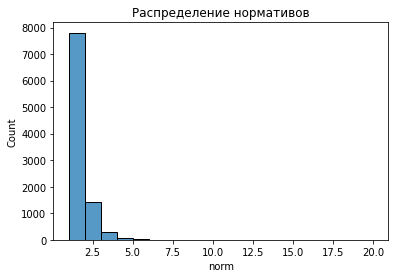

In [ ]:
sns.histplot(norm['norm'], binwidth=1)
plt.title('Распределение нормативов')

Нормативы в размере до 5 - допускаются, но больше требуют проверки. В дальнейшем анализе будут соотнесены нормативы, продажи и график отгрузок изделий со склада, чтобы оценить корректность нормативов. На изделия, приведённые ниже, необходимо обратить особое внимание. В данном случае эти позиции выбросами не являются. 

In [ ]:
norm.loc[norm['norm'] > 5].sort_values('norm')

,orthosalon,provider,name,code,norm
1546,51240,Ортопедия Тривес,тривес nova наконечник на трость коричневый 19...,2840611,6
4337,55857,Ортопедия Тривес,тривес мяч массажный игольчатый d-9см м-109,23577803,6
4739,50909,Ортопедия Никамед,ortmann solapro lana стельки ортопед. бежевые ...,30949003,6
4943,50909,Ортопедия Тривес,тривес мяч массажный игольчатый d-9см м-109,23577803,6
8317,56838,Ортопедия Тривес,тривес перегородка межпальцевая с кольцом на п...,30226403,6
8318,56838,Ортопедия Тривес,тривес перегородка межпальцевая с кольцом на п...,30226603,6
9576,57574,Ортопедия (Атлетика),ergopower лампа солевая 3-5кг er-502,33141603,7
6800,55977,Ортопедия Тривес,тривес перегородка межпальцевая с кольцом на п...,30226603,9
453,57115,Ортопедия (Атлетика),атлетика ergodynamic кинезиотейп телесный 5х500см,8517411,10
886,51436,Ортопедия (Атлетика),атлетика ergodynamic кинезиотейп телесный 5х500см,8517411,10


Проверим, есть ли некорректные значения нормативов (дробные, отрицательные)

In [ ]:
norm['norm'].unique()

array([ 1,  2,  4,  3,  5, 10,  6,  9,  7, 20])

# Таблица Остатки (remainder)

In [ ]:
remainder = pd.read_excel('remainder.xlsx')
remainder = remainder.rename(columns={'Код аптеки': 'orthosalon', 'Группа': 'provider', 'Наименование товара': 'name', 'Код ГЕС': 'code', 'Остатки шт': 'remainder_count', 'Остатки прих': 'remainder_purchase', 'Остатки розн': 'remainder_retail'})
remainder.head()

,orthosalon,provider,name,code,remainder_count,remainder_purchase,remainder_retail
0,57115,Ортопедия Меди,duomed гольфы компрессионные закрытый носок 1к...,31096303,1.0,1359.9,3990.0
1,57115,Ортопедия Меди,duomed гольфы компрессионные закрытый носок 1к...,31096403,1.0,1339.8,3990.0
2,57115,Ортопедия Меди,duomed гольфы компрессионные закрытый носок 1к...,31096703,1.0,1025.4,3990.0
3,57115,Ортопедия Меди,duomed гольфы компрессионные закрытый носок 2к...,31103703,1.0,1157.1,3990.0
4,57115,Ортопедия Меди,duomed гольфы компрессионные закрытый носок 2к...,31104203,1.0,1025.4,3990.0


In [ ]:
remainder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29390 entries, 0 to 29389
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   orthosalon          29390 non-null  int64  
 1   provider            29390 non-null  object 
 2   name                29390 non-null  object 
 3   code                29390 non-null  int64  
 4   remainder_count     29390 non-null  float64
 5   remainder_purchase  29390 non-null  float64
 6   remainder_retail    29390 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.6+ MB


В таблице remainder нет пустых значений, но есть строки, в которых поля равны 0. Такие строки нужно удалить, т.к. в таблице отображены остатки изделий, строки где изделий 0 смысла не несут.

In [ ]:
remainder =	remainder.loc[remainder['remainder_count'] > 0]

Уберём из таблицы остаки с ортопедической обувью и компрессионным трикотажем, т.к. эти категории в анализе не участвуют.

In [ ]:
remainder = remove_shoes_and_knitwear(remainder)

Чтобы в дальнейшем можно было анализировать данные в разбивке по группам и подгруппам, добавим в таблицу данные из классификатора.

In [ ]:
remainder2 = add_groups(remainder)
missing_classifier(remainder2)

,provider,name,code,group,subgroup,article
526,Ортопедия Экотен,экотен бандаж для детей шейный бежевый высота ...,2715107,NaN,NaN,NaN
595,Ортопедия (Атлетика),атлетика fosta подушка ортопедическая эффектом...,43926803,NaN,NaN,NaN
661,Ортопедия Никамед,henni ортопедическая готовая закрытый мыс серы...,41098503,NaN,NaN,NaN
958,Ортопедия Тривес,тривес стельки ортопед. детские р.26 ст-185.1 ...,12895311,NaN,NaN,NaN
959,Ортопедия Тривес,тривес стельки ортопед. детские р.27 ст-185.1 ...,12895211,NaN,NaN,NaN
962,Ортопедия Тривес,тривес стельки ортопед. детские р.30 ст-185.1,12418511,NaN,NaN,NaN
1422,Ортопедия Тривес,тривес бандаж компрессионный на коленный суста...,30379103,NaN,NaN,NaN
1423,Ортопедия Тривес,тривес бандаж компрессионный на коленный суста...,30379003,NaN,NaN,NaN
1882,Ортопедия Никамед,venoteks classic мед. мужские плотные закрытый...,32430103,NaN,NaN,NaN
2257,Ортопедия (Атлетика),fosta подушка ортопед. с эффектом памяти 50x32...,43827803,NaN,NaN,NaN


В данный список попали изделия, которые следует удалить и из остатков, и из классификатора (относятся к обуви или трикотажу, так же эти позиции следует передать соответсвующему специалисту, чтобы их корректно переименовали):
* henni ортопедическая готовая закрытый мыс серый р.6 /39.5 05403 h-j 649
* venoteks classic мед. мужские плотные закрытый мыс 2класс черные р.xl 2с214
* joost ортопедическая готовая закрытый мыс антрацит р.7.5 /41.5 05722 h 978
* venoteks classic ольфы женские плотные открытый мыс 2класс бежевые р.xl 201

In [ ]:
remainder = remainder.loc[~remainder['code'].isin([41098503,32430103,41100903, 30526703])]
classifier = classifier.loc[~classifier['code'].isin([41098503,32430103,41100903, 30526703])]

Посмотрим статистику данных, чтобы найти выбросы и аномалии. Рассматривать будем колонку remainder_count (остатки в шт), т.к.колонки remainder_purchase и remainder_retail - это остатки в шт, умноженные соответственно на цены приходные и розничные.


Text(0.5, 1.0, 'Распределение остатков, шт')

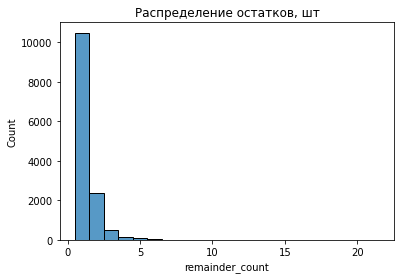

In [ ]:
sns.histplot(remainder['remainder_count'], binwidth=1)
plt.title('Распределение остатков, шт')

In [ ]:
round(remainder[['remainder_count']].describe(),2)

,remainder_count
count,13670.00
mean,1.34
std,0.85
min,0.50
25%,1.00
50%,1.00
75%,1.00
max,21.00


Из таблицы видно, что минимальное количество на остатках в штуках - 0.5. Это не является ошибкой, т.к. действительно некоторые товары продают по 0.5 упаковки.

In [ ]:
remainder.loc[remainder['remainder_count'] == 0.5]

,orthosalon,provider,name,code,remainder_count,remainder_purchase,remainder_retail
2460,51993,Ортопедия Никамед,ortmann solei приспособление ортопед. р.l f-00...,13034403,0.5,344.60,845.0
5651,55857,Ортопедия Никамед,bronigen костыли инвалидные регулируемые р.s bpc,25465103,0.5,653.16,2245.0
6802,50909,Ортопедия Никамед,костыли инвалидные с опорой под локоть двойной...,30193903,0.5,831.29,3845.0
11362,50299,Ортопедия Тривес,тривес эспандер кистевой игольчатый желтый 7см...,25833003,0.5,92.37,245.0


Проверим, есть ли другие нестандартные значения остатков

In [ ]:
remainder['remainder_count'].unique()

array([ 1.  ,  2.  ,  3.  ,  7.  ,  5.  ,  4.  ,  6.  ,  9.  ,  8.  ,
       11.  ,  4.28,  3.9 ,  0.5 ,  1.5 , 21.  , 16.  , 19.  , 17.  ,
        4.5 , 10.  , 14.  ])

In [ ]:
remainder.loc[remainder['remainder_count'].isin([4.28, 3.9, 1.5, 4.5])]

,orthosalon,provider,name,code,remainder_count,remainder_purchase,remainder_retail
1702,57514,Ортопедия (Атлетика),атлетика полотно синтетическое мерное вата 10с...,33887303,4.28,534.64,1797.6
2278,51240,Ортопедия (Атлетика),атлетика полотно синтетическое мерное вата 10с...,33887303,3.90,490.07,1638.0
2462,51993,Ортопедия Никамед,ortmann приспособление корригирующее р.l f-000...,29257303,1.50,1739.94,4335.0
2467,51993,Ортопедия Никамед,ortmann приспособление корригирующее р.m f-000...,28789903,1.50,1598.04,4335.0
6564,50909,Ортопедия Никамед,balancing plates pro косок под пятку eb29 he 1...,36571203,4.50,1708.23,1800.0
6895,50909,Ортопедия Тривес,костыли подмышечные алюминиевые с упс р.m 116-...,4900611,1.50,2452.28,5985.0


Данные изделия действительно могут продаваться в таких количествах 

In [ ]:
remainder.loc[remainder['remainder_count'] > 5]

,orthosalon,provider,name,code,remainder_count,remainder_purchase,remainder_retail
254,57115,Ортопедия Тривес,тривес nova наконечник на трость коричневый 19...,2840611,7.0,350.77,1120.0
333,57115,Ортопедия Тривес,тривес наконечник против скольжения резиновый ...,30484803,7.0,399.84,1365.0
338,57115,Ортопедия Тривес,тривес перегородка межпальцевая с кольцами на ...,32429403,6.0,844.56,1920.0
343,57115,Ортопедия Тривес,тривес перегородка межпальцевая с кольцом на п...,30226603,6.0,1097.94,1920.0
588,57115,Ортопедия (Атлетика),атлетика ergodynamic кинезиотейп телесный 5х500см,8517411,6.0,1335.49,3900.0
...,...,...,...,...,...,...,...
11942,56838,Ортопедия Тривес,тривес перегородка межпальцевая с кольцом на п...,30226603,6.0,844.56,1920.0
12623,57573,Ортопедия (Атлетика),атлетика мини-велотренажер ортосила темно-серы...,42358203,6.0,7460.30,15900.0
13513,57574,Ортопедия Тривес,тривес стельки ортопед. шерсть р.41 ст-133,30429903,7.0,1988.43,5320.0
13640,57574,Ортопедия (Атлетика),ergopower лампа солевая 3-5кг er-502,33141603,7.0,4610.43,11893.0


Все изделия, которые числятся на остатках в количестве более 5 штук, - мелкие изделия, относящиеся к сопутсвующим товарам. Такое их количество допускается, если это соответствует продажам.  

# Таблица Продажи (sales)

In [ ]:
sales = pd.read_excel('sales.xlsx', sheet_name='Лист1')

# т.к. столбцов для переименования очень много, создадим словарь {старое название:новое название}, чтобы не прописывать его вручную
columns = sales.columns
new_name = ['orthosalon','provider','name','code','01_20_count','02_20_count','03_20_count','04_20_count','05_20_count','06_20_count','07_20_count','08_20_count','09_20_count','10_20_count','11_20_count','12_20_count','01_21_count','02_21_count','03_21_count','04_21_count','05_21_count','06_21_count','07_21_count','08_21_count','09_21_count','10_21_count','11_21_count','12_21_count','01_22_count','02_22_count','03_22_count','04_22_count','05_22_count','total_count','01_20_purchase','02_20_purchase','03_20_purchase','04_20_purchase','05_20_purchase','06_20_purchase','07_20_purchase','08_20_purchase','09_20_purchase','10_20_purchase','11_20_purchase','12_20_purchase','01_21_purchase','02_21_purchase','03_21_purchase','04_21_purchase','05_21_purchase','06_21_purchase','07_21_purchase','08_21_purchase','09_21_purchase','10_21_purchase','11_21_purchase','12_21_purchase','01_22_purchase','02_22_purchase','03_22_purchase','04_22_purchase','05_22_purchase','total_purchase','01_20_retail','02_20_retail','03_20_retail','04_20_retail','05_20_retail','06_20_retail','07_20_retail','08_20_retail','09_20_retail','10_20_retail','11_20_retail','12_20_retail','01_21_retail','02_21_retail','03_21_retail','04_21_retail','05_21_retail','06_21_retail','07_21_retail','08_21_retail','09_21_retail','10_21_retail','11_21_retail','12_21_retail','01_22_retail','02_22_retail','03_22_retail','04_22_retail','05_22_retail','total_retail']
new_name_dict = {}
for index, name in enumerate(columns):
  new_name_dict[name] = new_name[index]

sales = sales.rename(columns=new_name_dict)
sales.head()

,orthosalon,provider,name,code,01_20_count,02_20_count,03_20_count,04_20_count,05_20_count,06_20_count,...,09_21_retail,10_21_retail,11_21_retail,12_21_retail,01_22_retail,02_22_retail,03_22_retail,04_22_retail,05_22_retail,total_retail
0,57115,Ортопедия Меди,duomed гольфы компрессионные закрытый носок 1к...,31427203,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,3135.0,NaN,NaN,NaN,NaN,6035.0
1,57115,Ортопедия Меди,duomed гольфы компрессионные закрытый носок 1к...,31096603,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3072.0
2,57115,Ортопедия Меди,duomed гольфы компрессионные открытый носок 2к...,35115603,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2992.5,NaN,NaN,5920.5
3,57115,Ортопедия Меди,duomed гольфы компрессионные открытый носок 2к...,35115303,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3050.0
4,57115,Ортопедия Меди,duomed гольфы компрессионные открытый носок 2к...,35115703,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3050.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5947.5


В данном случае NaN	означает, что продаж в этом месяце не было, поэтому заменим NaN на 0.

In [ ]:
sales = sales.fillna(0.)

В анализе не будут участовать обувь и компресионный трикотаж, поэтому удалим их из данных.

In [ ]:
sales = remove_shoes_and_knitwear(sales)

Проверим, есть ли строки, где за весь период продаж не было (таких не оказалось)

In [ ]:
sales.loc[sales['total_count'] == 0.]

,orthosalon,provider,name,code,01_20_count,02_20_count,03_20_count,04_20_count,05_20_count,06_20_count,...,09_21_retail,10_21_retail,11_21_retail,12_21_retail,01_22_retail,02_22_retail,03_22_retail,04_22_retail,05_22_retail,total_retail


Добавим поля группа, подгруппа и артикул из классификатора.

In [ ]:
sales = sales.loc[~sales['code'].isin([41098503,32430103,41100903, 30526703])]
sales2 = add_groups(sales)
missing_classifier(sales2)

,provider,name,code,group,subgroup,article
716,Ортопедия Экотен,экотен бандаж для детей шейный бежевый высота ...,2715107,NaN,NaN,NaN
791,Ортопедия (Атлетика),атлетика fosta подушка ортопедическая эффектом...,43926803,NaN,NaN,NaN
1524,Ортопедия Никамед,orlett бандаж на коленный сустав р.xxl rkn-103(m),5034307,NaN,NaN,NaN
1828,Ортопедия Тривес,тривес бандаж компрессионный на коленный суста...,30379203,NaN,NaN,NaN
1829,Ортопедия Тривес,тривес бандаж компрессионный на коленный суста...,30379103,NaN,NaN,NaN
2800,Ортопедия (Атлетика),fosta подушка ортопед. с эффектом памяти 50x32...,43827803,NaN,NaN,NaN
5833,Ортопедия Тривес,тривес корректор осанки для взрослых р.m 81-89...,4598407,NaN,NaN,NaN
6266,Ортопедия Меди,подушка ортопед. для сидения синяя 37см,30116303,NaN,NaN,NaN
6679,Ортопедия Никамед,эстилодез спрей дезинфицирующий для обуви 0.75...,36841403,NaN,NaN,NaN
6988,Ортопедия Тривес,тривес стельки ортопед. взрослые индивидуальны...,42902503,NaN,NaN,NaN


После того, как во все три таблицы (нормативы, остатки, продажи) добавили информацию из классификатора и выявили позиции без групп, поддгрупп и артикулов, скорректируем классификатор по этим позициям. Для быстроты и удобства выгрузим список в эксель, заполним там недостающие данные, загрузим обратно, добавим к классификатору.

In [ ]:
writer = pd.ExcelWriter('output.xlsx') 
classifier[classifier['group'].isnull()].to_excel(writer)
writer.save()

In [ ]:
classifier_add = pd.read_excel('classifier_add.xlsx')
classifier = classifier.append(classifier_add, ignore_index = True)
classifier = classifier[~classifier['group'].isnull()]

Теперь снова прогоним таблицы нормативы, остатки и продажи через функцию add_groups, ко всем строкам должны добавиться группа, подгруппа и артикул

In [ ]:
norm = add_groups(norm)
remainder = add_groups(remainder)
sales = add_groups(sales)

В дальнейшем анализе будет удобно, чтобы группа, подгруппа и артикул были не в конце таблицы, а перед продажами. Поменяеим столбцы местами:

In [ ]:
cols = sales.columns.tolist()
cols = cols[0:2] + cols[-3:] + cols[2:-3]
sales = sales[cols] 

Проверим дупликаты

In [ ]:
sales.duplicated().sum()

26

In [ ]:
sales = sales.drop_duplicates().reset_index(drop = True)

Исследуем данные на выбросы

In [ ]:
round(sales[['total_count']].describe(),2)

,total_count
count,15255.00
mean,4.33
std,7.27
min,0.50
25%,1.00
50%,2.00
75%,5.00
max,228.00


Text(0.5, 1.0, 'Распределение продаж, шт')

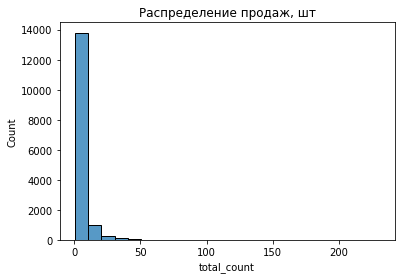

In [ ]:
sns.histplot(sales['total_count'], binwidth=10)
plt.title('Распределение продаж, шт')

In [ ]:
sales.loc[sales['total_count']>140]

,orthosalon,provider,group,subgroup,article,name,code,01_20_count,02_20_count,03_20_count,...,09_21_retail,10_21_retail,11_21_retail,12_21_retail,01_22_retail,02_22_retail,03_22_retail,04_22_retail,05_22_retail,total_retail
785,57115,Ортопедия (Атлетика),прочее,-,-,атлетика ergodynamic кинезиотейп телесный 5х500см,8517411,3.0,0.0,2.0,...,8112.5,3944.4,3364.0,4489.2,3787.4,0.0,0.0,650.0,0.0,77554.00
11014,55977,Ортопедия Тривес,стельки и приспособления,приспособления для стопы,ст-54,тривес перегородка межпальцевая с кольцом на п...,30226603,5.0,9.0,12.0,...,2695.0,3045.0,1330.0,1627.5,700.0,1715.0,1932.5,2655.0,5571.5,79035.46


Данные изделия действительно продаются в таком количестве, выбросом не являются

# Графическое исследование данных

Построим график, чтобы увидеть динамику продаж. За рассматриваемый период положительной динамики не отслеживается, продажи на одном уровне. (Провал в апреле 2020 г. связан с тем, что все ортосалоны были закрыты в связи с короновирусом, совершались только доставки в поликлиники).

Text(0.5, 1.0, 'Динамика продаж в розничных ценах')

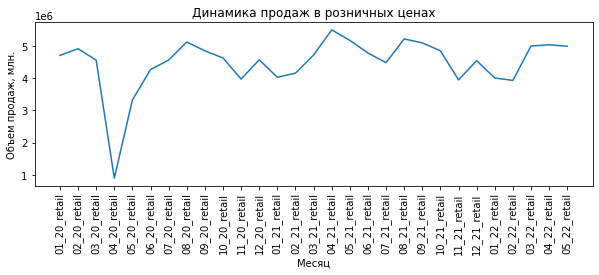

In [ ]:
# выделяем все продажи в розничных ценах, считаем итог по каждому месяцу 
df_retail = sales.loc[:,'01_20_retail':'05_22_retail']
df_retail.loc['Total',:] = df_retail.sum(axis=0)
df_retail = df_retail.T.reset_index()

fig = plt.figure(figsize=(10, 3))
df_retail['Total'].plot(xlabel='Месяц',  ylabel='Объем продаж, млн.')
plt.xticks(np.arange(len(df_retail)), df_retail['index'],rotation=90)
plt.title('Динамика продаж в розничных ценах')

Посмотрим суммарные продажи за год и остатки (розн ценах) по салонам. Из этой диаграммы видно, что запасы превышают  годовой объём продаж или равны ему более чем в половине салонов, что подтверждает необходимость проработки ассортимента в каждом салоне. 



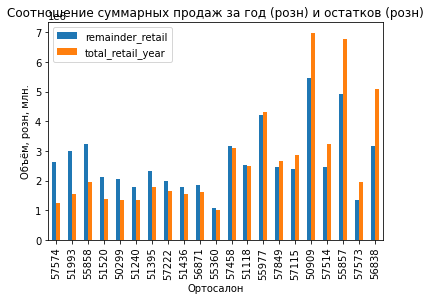

In [ ]:
#группируем остатки по салонам
remainder_group = remainder[['orthosalon','remainder_retail']].groupby(['orthosalon']).sum().sort_values('remainder_retail', ascending=False)
#группируем продажи  по салонам
sales_group = sales[['orthosalon','06_21_retail', '07_21_retail', '08_21_retail', '09_21_retail', '10_21_retail','11_21_retail', '12_21_retail', '01_22_retail', '02_22_retail','03_22_retail', '04_22_retail', '05_22_retail']].groupby(['orthosalon']).sum()
#добавляем сумму продаж за последние 12 месяцев
sales_group['total_retail_year'] = sales_group.sum(axis=1)
#соединяем таблицы
sales_group = sales_group.merge(remainder_group, on = 'orthosalon', how='left')
#считаем отношнение остатков к продажам и сортируем по получившемуся значению (коэффициент оборачиваемости)
sales_group['turnover_ratio'] = sales_group['remainder_retail']/sales_group['total_retail_year']
sales_group = sales_group.sort_values('turnover_ratio', ascending=False)

sales_group[['remainder_retail', 'total_retail_year']].plot(kind='bar', title='Соотношение суммарных продаж за год (розн) и остатков (розн)', xlabel='Ортосалон', ylabel='Объём, розн, млн.')

Посмотрим, какие группы имеют большую долю в продажах, чтобы понять, на какие группы смотреть в первую очередь при дальнейшем анализе. 

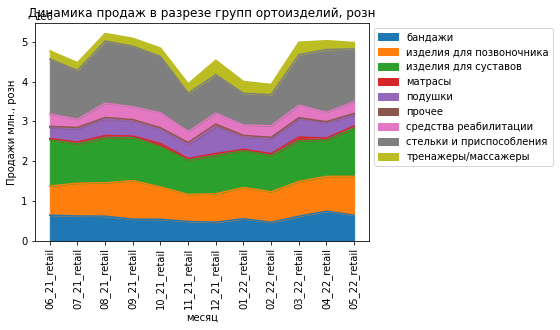

In [ ]:
sales_group2 = sales[['group','06_21_retail', '07_21_retail', '08_21_retail', '09_21_retail', '10_21_retail','11_21_retail', '12_21_retail', '01_22_retail', '02_22_retail','03_22_retail', '04_22_retail', '05_22_retail']].groupby(['group']).sum()
sales_group2T = sales_group2.T.reset_index()

sales_group2T.plot(kind='area',
                      title= 'Динамика продаж в разрезе групп ортоизделий, розн', 
                      xlabel='месяц', 
                      stacked=True,
                      ylabel='Продажи млн., розн')

plt.xticks(np.arange(len(sales_group2T)), sales_group2T['index'],rotation=90)
plt.legend(bbox_to_anchor=(1, 1))

Также представляет интерес, рассмотреть продажи каких поставщиков преобладают в группах изделий. 

Text(0.5, 1.0, 'Тепловая карта продаж по поставщикам и группам изделий, млн.розн')

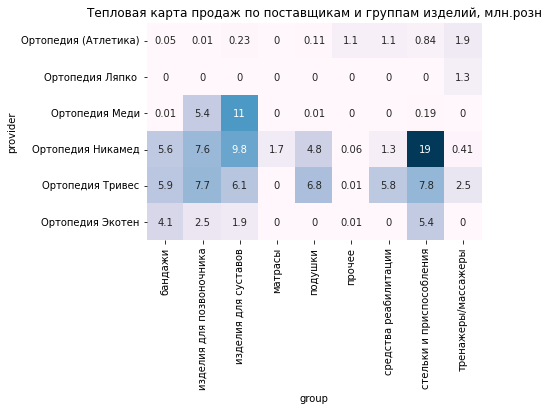

In [ ]:
sales_group3 = sales[['group', 'provider', 'total_retail']].groupby(['group', 'provider']).sum()
sales_group3 = sales_group3.pivot_table(index='provider', columns='group', values='total_retail', aggfunc=sum).fillna(0)
sales_group3 = round(sales_group3/1000000,2)
sns.heatmap(sales_group3, cmap='PuBu', annot = True, cbar=False)
plt.title('Тепловая карта продаж по поставщикам и группам изделий, млн.розн')

# **Основная часть**

# Анализ ассортимента методом Дибба-Симкина

Создадим таблицу, на основе которой будет проводиться анализ.
 Поля: ортосалон, группа, подгруппа, артикул, объём продаж (шт), объем продаж (розн), маржинальный доход.

In [ ]:
# Группируем таблицу с продажами по салонону, группе, подгруппе и артикулу
df_DS = sales.groupby(['orthosalon','group', 'subgroup', 'article']).sum().reset_index()
# Считаем объем продаж за исследуемый период в шт, розн и прих ценах, маржинальный доход
df_DS['SV_count'] = df_DS.loc[:, '06_21_count':'05_22_count'].sum(axis=1)
df_DS['SV_purchase'] = df_DS.loc[:, '06_21_purchase':'05_22_purchase'].sum(axis=1)
df_DS['SV_retail'] = df_DS.loc[:, '06_21_retail':'05_22_retail'].sum(axis=1)
df_DS['PM'] = df_DS['SV_retail'] - df_DS['SV_purchase']

# Создаём таблицу для анализа 
D_S = round(df_DS[['orthosalon','group', 'subgroup', 'article', 'SV_count', 'SV_retail', 'PM']],1)

Пишем функции, которые в созданную таблицу добавят колонки с грппой Дибба-Симкина и соответсвующими рекомендацями. Применяем функции


In [ ]:
def add_group_D_S(row):
  """
  Функция примает на вход значения строки и по ним определяет групу Дибба-Симкина
  по изделию в разрезре каждого салона и группы классификатора
  """
  # Оставляем строки только по салону и группе, ктр указаны в строке таблицы
  D_S_salon_group = D_S.loc[(D_S['orthosalon'] == row['orthosalon']) & (D_S['group'] == row['group'])]
  
  # Вычисляем среднее по полям маржинальный доход и объем продаж 
  b = D_S_salon_group['PM'].mean()
  d = D_S_salon_group['SV_count'].mean()

  # Присваиваем группу 
  if (row['PM'] >= b) & (row['SV_count'] >= d): return "A"
  elif (row['PM'] < b) & (row['SV_count'] >= d): return "B1"
  elif (row['PM'] < b) & (row['SV_count'] < d): return "C"
  else: return "B2"

In [ ]:
D_S['group_D_S'] = D_S.apply(add_group_D_S, axis=1)  

In [ ]:
def add_rec_D_S(row):
  """
  Функция примает на вход значения строки. По значению столбца 'group_D_S' ставит соответствующую рекомендацию
  """
  if row['group_D_S'] == "A": return "Эталон"
  elif row['group_D_S'] == "B1": return "Поиск повышения доходности товара"
  elif row['group_D_S'] == "C": return "Рассмотреть возможность замены/исключения изделия"
  else: return "Поиск возможности увеличения продаж"

In [ ]:
D_S['rec_D_S'] = D_S.apply(add_rec_D_S, axis=1) 
D_S.head()

,orthosalon,group,subgroup,article,SV_count,SV_retail,PM,group_D_S,rec_D_S
0,50299,бандажи,бандаж до- и послеродовый,ms-96,1.0,2840.5,1143.4,C,Рассмотреть возможность замены/исключения изделия
1,50299,бандажи,бандаж до- и послеродовый,ms-99,1.0,3980.5,2100.7,C,Рассмотреть возможность замены/исключения изделия
2,50299,бандажи,бандаж до- и послеродовый,др-01,20.0,38228.0,19473.1,A,Эталон
3,50299,бандажи,бандаж послеоперационный,ab-309,1.0,3136.5,1210.0,C,Рассмотреть возможность замены/исключения изделия
4,50299,бандажи,бандаж послеоперационный,ab-309s,2.0,1980.0,-2010.0,C,Рассмотреть возможность замены/исключения изделия


Сохраняем отчёт для стейкхолдеров, делаем каждый салон на отдельный лист для удобства стейкхолдеров

In [ ]:
orthosalon_list = D_S['orthosalon'].unique()
rec_DS = pd.ExcelWriter('rec_DS.xlsx')
for element in orthosalon_list:
  D_S.loc[D_S['orthosalon'] == element].to_excel(rec_DS, f'{element}')
rec_DS.save()

Напишем функцию, которая будет отрисовывать матрицу Дибба-Симкина для заданного ортосалона и группы

In [ ]:
def dibb_simkin_matrix(orthosalon, group, save=0):
  """
  Функция выводит на экран матрицу Дибба-Симкина для указанного в её параметрах ортосалона и группы классификатора.
  Для сохранения графика в каталог проекта параметр save нужно задать как 1. Изначально задан 0.
  """
  # Формируем таблицу по заданному салону и группе
  df_D_S_salon = D_S.loc[(D_S['orthosalon'] == orthosalon) & (D_S['group'] == group)]

  # График Дибба-Симкина 
  fig = plt.figure(figsize=(8, 6))
  sns.scatterplot(x= 'PM', y= 'SV_count', data=df_D_S_salon, hue='article', style = 'article', s = 200)
  plt.legend(bbox_to_anchor=(1, 1), fontsize=13, ncol=2)
  plt.title(f'Матрица Дибба-Симкина. Ортосалон: {orthosalon}, группа: {group}')

  # Границы, разделяющие группы Дибба-Симкина 
  plt.plot([df_D_S_salon['PM'].mean(), df_D_S_salon['PM'].mean()], [0, df_D_S_salon['SV_count'].max()],'--b')
  plt.plot([0, df_D_S_salon['PM'].max()], [df_D_S_salon['SV_count'].mean(), df_D_S_salon['SV_count'].mean()],'--b')

  if save == 1:
    plt.savefig(f'Ортосалон {orthosalon}, группа: {group}.png', bbox_inches = "tight")


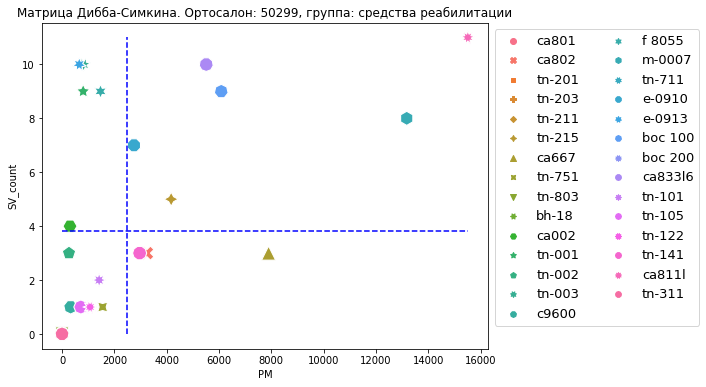

In [ ]:
dibb_simkin_matrix(50299, 'средства реабилитации')

# Нормативы

In [ ]:
def check_norm(orthosalon, to_screen = 1, to_excel = 0):
  """
  Функция расчитывает средние продажи за 12 месяцев, сравнивает их с нормативами и 
  выводит рекомендации по изменению нормативов: снять, поставить, повысить, понизить нормативы.

  В параметре orthosalon нужно указать или код ортосалона, если нужно вывести данные по салону,
  или указать 'all',чтобы вывести общую таблицу.

  В параметре to_screen нужно задать 1, если отчёт нужно вывести на экран,
  и 0, если выводить на экран не нужно. Изначально to_screen задан как 1.

  В параметре to_excel нужно задать 1, чтобы таблицу с рекомендациями сохранить в эксель,
  и 0, если выгружать таблицу не нужно. Изначально to_excel задан как 0.

  """
  # СОЗДАЁМ ТАБЛИЦУ ДЛЯ АНАЛИЗА ПО ЗАДАННОМУ САЛОНУ 
 
  df = sales.iloc[:, :36]
  df = df.drop(df.columns[7:24], axis = 1)
  # Добавляем в таблицу Продажи столбцы со средними продажами за последние 12 месяцев и сумму продаж за последние 12 месяцев
  df['arg_12_month'] = round(df.loc[:, '06_21_count':].mean(axis=1), 2)
  df['sum_12_month'] = round(df.loc[:, '06_21_count':'05_22_count'].sum(axis=1), 2)
  # Убираем столбцы с нулевыми средними и общими продажами
  df = df.loc[~((df['sum_12_month']==0.) & (df['arg_12_month']==0.))]
  # В таблицу с продажами добавляем нормативы
  df = df.merge(norm, how = 'outer').fillna(0)
  # Добавляем колонку с коэффициентом, показывающим соотношение норматива к продажам
  df['arg_norm'] = round(df['arg_12_month'] / df['norm'], 2) 
  
  # АНАЛИЗИРУЕМ НОРМАТИВЫ 

  def recommendations_add(row):
    """
    Функция проставляет соответсвующие рекоменедации на основе средних продаж и нормативов. С подробным алгоритмом можно ознакомится в отчёте по дипломной работе
    """
    if (row['norm'] == 0) & (row['arg_12_month'] >= 0.5):
      return "Поставить на нормативы"
    elif ((row['norm'] == 1) & (row['arg_norm'] < 0.25)) or ((row['norm'] > 1) & (row['arg_norm'] <= 0.1)):
      return "Снять с нормативов"   
    elif ((row['norm'] == 1) & (row['arg_norm'] > 1.5)) or ((row['norm'] > 1) & (row['arg_norm'] > 1.5)) :
      return "Повысить норматив"   
    elif (row['norm'] > 1) & (row['arg_norm'] > 0.1) & (row['arg_norm'] <= 0.5):
      return "Снизить  норматив"    
    else:
      return "Норматив соответвует продажам"

  # Добавляем колонку с рекомендациями
  df['recommendations'] = df.apply(recommendations_add, axis=1)
  df = df.sort_values(['orthosalon', 'recommendations'])
 
  # ВЫВОД РЕЗУЛЬТАТОВ

  if orthosalon != "all":
    df = df.loc[df['orthosalon'] == orthosalon]

  if to_screen == 1:
     return df

  if to_excel == 1:
    rec_norm = pd.ExcelWriter(f'rec_salon_{orthosalon}.xlsx') 
    df.to_excel(rec_norm)
    rec_norm.save()

Сохраняем отчёт для стейкхолдеров, делаем каждый салон на отдельный лист для удобства стейкхолдеров

In [ ]:
orthosalon_list = D_S['orthosalon'].unique()
rec_norm = pd.ExcelWriter('rec_norm.xlsx')
for element in orthosalon_list:
  check_norm(element, 1, 0).to_excel(rec_norm, f'{element}')
rec_norm.save()

# Проверка гипотез

Посмотрим статистику по рекомендациям по изменению нормативов и коэффициенту оборачиваемости. Как видно из таблицы коэффициент оборачиваемости у большинства салонов превышает 1, в у некоторых салонов около 2 и выше, это значит, что остатков в салоне на год (и 2 года соответственно). У большинства салонов необходимо снять с нормативов более 50% ассортимента - это товары, у которых за год не было продаж.  

In [ ]:
df_turnover_ratio = sales_group.reset_index()
df_turnover_ratio = round(df_turnover_ratio[['orthosalon','turnover_ratio']],1)
df_stats = pd.pivot_table(check_norm('all', 1), index = 'orthosalon', columns = 'recommendations', values='name', aggfunc='count', fill_value=0).sort_values('Норматив соответвует продажам', ascending=0)
df_stats = df_stats.merge(df_turnover_ratio, on = 'orthosalon', how='left').sort_values('turnover_ratio', ascending=0)
df_stats.style.background_gradient(cmap='Blues', axis=0)

,orthosalon,Норматив соответвует продажам,Поставить на нормативы,Снизить норматив,Снять с нормативов,turnover_ratio
20,57574,93,0,50,373,2.100000
8,51993,194,3,45,332,1.900000
12,55858,184,0,41,346,1.600000
19,50299,121,1,22,401,1.500000
14,51520,169,0,11,369,1.500000
17,51395,124,0,27,383,1.300000
9,51240,191,2,18,283,1.300000
16,56871,128,0,20,323,1.200000
15,57222,161,1,43,332,1.200000
13,51436,175,1,16,346,1.200000


**Выдвинута гипотеза о том, что при корректировке нормативов коэффициент оборачиваемости салона уменьшится (Н1).**

Рассчитаем коэффициент оборачиваемости для каждого изделия, чтобы рассмотреть его распределение.

Text(0.5, 1.0, 'Распределение коэффициента оборачиваемости')

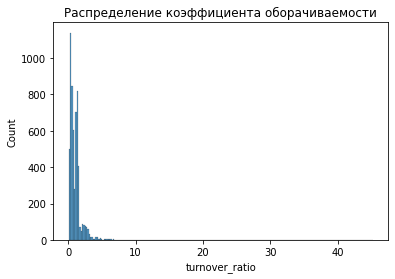

In [ ]:
# Собираем таблицу с продажами в розничных ценах за последние 12 месяцев 
df_hip = sales.loc[:, :'05_22_retail']
df_hip = df_hip.drop(df_hip.columns[7:84], axis = 1).drop(df_hip.columns[1:5], axis = 1)
df_hip['sum_year_retail'] = df_hip.loc[:, '06_21_retail':].sum(axis=1)
df_hip = df_hip[['orthosalon', 'name', 'code', 'sum_year_retail']]
# Таблица с остаткми 
df_remainder = remainder[['orthosalon', 'name', 'code', 'remainder_retail']]
# Добавляем остатки и считаем коэффициент оборачиваемости по каждой позиции
df_hip = df_hip.merge(df_remainder, how='left').fillna(0)
df_hip = df_hip.loc[~((df_hip['sum_year_retail'] == 0.)&(df_hip['remainder_retail'] == 0.))]
df_hip = df_hip.loc[~((df_hip['sum_year_retail'] == 0.) | (df_hip['remainder_retail'] == 0.))]
df_hip['turnover_ratio'] = round(df_hip['remainder_retail'] / df_hip['sum_year_retail'],2)

sns.histplot(df_hip['turnover_ratio'], binwidth=0.2)
plt.title('Распределение коэффициента оборачиваемости')

In [ ]:
df_hip.loc[df_hip['turnover_ratio'] > 10]

,orthosalon,name,code,sum_year_retail,remainder_retail,turnover_ratio
2222,57514,армед бинт полиуретановый мягкий белый 10х360с...,7762711,482.40,5489.0,11.38
2235,57514,атлетика бинт полиуретановый мягкий белый 7.5x...,33894103,375.20,4550.0,12.13
2239,57514,атлетика полотно синтетическое мерное вата 10с...,33887303,39.90,1797.6,45.05
3098,51993,тривес массажер для различных частей тела трио...,25560103,112.51,1400.0,12.44
3103,51993,тривес мяч массажный игольчатый d-5.5см м-105,23577403,237.50,3990.0,16.80
4265,57849,тривес бандаж дородовый р.s/3 (70-85) т-1118/т...,854707,590.00,6150.0,10.42
7879,50909,никамед middle density pro пелот для стелек 90...,34577903,500.00,5500.0,11.00
7928,50909,никамед t-form middle density pro пелот для ст...,34578903,400.00,4500.0,11.25
10602,55977,orlett ортез на лучезапястный сустав левый р.x...,27586103,990.00,15270.0,15.42


Исключим выбросы и построим график распределение ещё раз

Смоделируем изменения после применения рекомендаций и построим распределение. Предположим, что норматив снят, изделие  продано, новое изделие не приходит, остатки уменьшились.

In [ ]:
# Добавляеим в таблицу рекомендации 
rec = check_norm('all', 1)[['orthosalon', 'name','code', 'recommendations']]
df_hip = df_hip.merge(rec, how='left')

# Готовим таблицу с ценой за единицу товара, чтобы можно было корректировать остатки в розничных ценах 
df_remainder2 = remainder[['orthosalon', 'name', 'code', 'remainder_retail', 'remainder_count']]
df_remainder2['unit_price'] = df_remainder2['remainder_retail'] / df_remainder2['remainder_count']
df_remainder2 = df_remainder2[['orthosalon', 'name', 'code', 'unit_price']]
df_remainder2

# Соединяем таблицы
df_hip = df_hip.merge(df_remainder2, how='left')

# Пишем функцию, которая скорректирует остатки на основе рекомендаций 

def new_remainder_retail(row):
  if row['recommendations'] == 'Норматив соответвует продажам': return row['remainder_retail']
  elif row['recommendations'] == 'Поставить на нормативы': return (row['remainder_retail']+row['unit_price'])
  elif row['recommendations'] == 'Снизить  норматив': return (row['remainder_retail']-row['unit_price'])
  elif row['recommendations'] == 'Снять с нормативов': return 0.

df_hip['new_remainder_retail'] = df_hip.apply(new_remainder_retail, axis=1)  
df_hip = df_hip.loc[~(df_hip.recommendations.isnull())]
df_hip['new_turnover_ratio'] = df_hip['new_remainder_retail']/df_hip['sum_year_retail']
df_hip = df_hip.loc[~(df_hip.new_turnover_ratio == 0.)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
def two_histograms(x, y, binwidth):
    """
    Функция, которая построит две гистограммы на одной картинке.
    """
    sns.histplot(x, binwidth=binwidth,alpha=0.5, color='r')
    sns.histplot(y, binwidth=binwidth,alpha=0.3)
    plt.legend([x.name, y.name])

Text(0.5, 1.0, 'Распределение коэффициентов оборачиваемости до и после изменений нормативов')

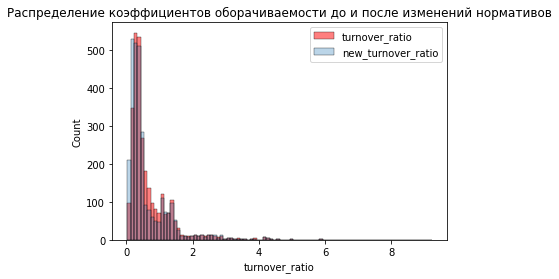

In [ ]:
df_hip = df_hip.loc[~(df_hip['turnover_ratio'] > 10)]
two_histograms(df_hip['turnover_ratio'], df_hip['new_turnover_ratio'], 0.1)
plt.title('Распределение коэффициентов оборачиваемости до и после изменений нормативов')

На графиках выше не нормальное распределение. Поэтому посмотрим на логарифм исследуемой величины, который может быть распределён по нормальному закону.

Text(0.5, 1.0, 'Распределение логарифмов коэффициентов оборачиваемости до и после изменений нормативов')

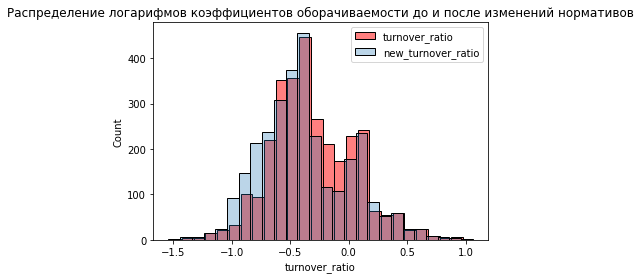

In [ ]:
two_histograms(np.log10(df_hip['turnover_ratio']), np.log10(df_hip['new_turnover_ratio']), 0.1)
plt.title('Распределение логарифмов коэффициентов оборачиваемости до и после изменений нормативов')

Проведём тест на равенство медиан 

In [ ]:
# тест Уилкоксона Н0 - медианы равны; Н1 - медианы не равны.
hypothesis_testing(np.log10(df_hip['turnover_ratio']), np.log10(df_hip['new_turnover_ratio']),'wilcoxon')

p-value: 2.0888045859210315e-82
Уровень значимости 0.05
Отклонение от уровня значимости -0.05
Ho отвергается, принимается Н1


**Гипотеза 2:**

**При выявлении группы товаров, на которые можно поднять цену без риска для спроса, и поднятии на них цену, прибыль салонов увеличится (Н2).**

Определим товары, на которые можно поднять цену - это товары группы B1 классификации Дибба-Симкина, причём это товары, которые попали в данную группу у большинства ортосалонов (т.к. нельзя поднять цену на товар только в нескольких салонах)

In [ ]:
df_B1 = pd.pivot_table(D_S, index = 'article', columns = 'group_D_S', values='orthosalon', aggfunc='count', fill_value=0)
df_B1 = df_B1.loc[df_B1['B1'] >= 10].sort_values('B1', ascending= 0)
df_B1.style.background_gradient(cmap='Blues', axis=0)

group_D_S,A,B1,B2,C
article,,,,
tn-001,0,19,0,2
tn-002,0,15,0,6
ca002,0,14,0,7
tn-003,0,14,0,5
solamed replet,5,13,0,3
ban-101(m),4,12,0,4
е-0913,0,12,0,9
м-111,2,12,0,6
rh107,0,11,0,9


 * На артикулы tn-001, tn-002, tn-003, ca003, е-0913, rh107 можно поднять цену, т.к. они у большинства салонов находятся в группе B1 и не находятся в группах А и В2 (у некоторых салонов они в группе С, что значит необходимость вывести эти товары из оборота или заменить), кроме этого данные изделия не продаются у конкурентов.
 * На артикулы er-1014, f 8055, fg-100, м-111 и м-109 можно поднять цену, т.к. они у большинства салонов находятся в группе B1, не находятся в групрпе В2 (у некоторых салонов они в группе С, что значит необходисмоть вывести эти товары из оборота или заменить и у 2-3 салонов в группе А, это допускает изменение цены во всех салонах), кроме этого аналоги этих изделий у конкуретнов дороже.
 * На артикул прр-02 цену не меняем, т.к. группа А занимает такую же гдолю как и группа В1.
 * На артикул solamed replet, ban-101(m) и ansof цену не меняем, т.к. эти изделия продаются у конкурентов. 

В таблицу с продажами добавим столбцы с прибылью до и после изменения цены на выбранные артикулы (цену поднимаем на 5%)

In [ ]:
sales['profit'] = sales['total_retail']-sales['total_purchase']
sales['new_profit'] = sales['total_retail']-sales['total_purchase']
sales.loc[sales['article'].isin(['tn-001', 'tn-002', 'tn-003', 'ca002', 'fg-100', 'f 8055', 'er-1014', 'e-0913', 'rh107', 'м-111', 'м-109']), 'new_profit'] = 1.05 * sales['total_retail'] - sales['total_purchase']

Text(0.5, 1.0, 'Распределение прибыли от продаж до и после изменения цен')

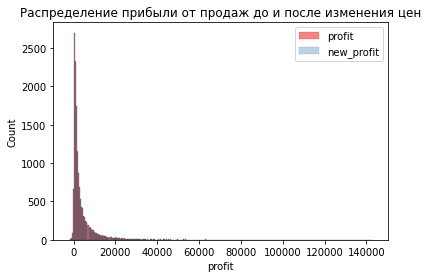

In [ ]:
two_histograms(sales['profit'], sales['new_profit'], 500)
plt.title('Распределение прибыли от продаж до и после изменения цен')

На графиках выше не нормальное распределение. Поэтому посмотрим на логарифм исследуемой величины, который может быть распределён по нормальному закону.

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Распределение логарифмов прибыли от продаж до и после изменения цен')

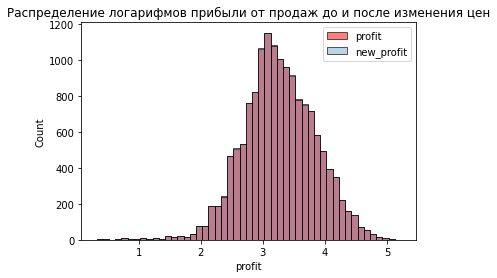

In [ ]:
two_histograms(np.log10(sales['profit']), np.log10(sales['new_profit']), 0.1)
plt.title('Распределение логарифмов прибыли от продаж до и после изменения цен')

Как видно на графиках, распределения идентичны, следовательно изменение цены не влияет на прибыль. Изменений нет так как в группу товаров, на которые можно поднять цену попало мало изделий и все они очень мелкие (например, наконечники на трость, мячи-массажёры) и  больше относятся к сопутствующим товарам.

In [ ]:
def hypothesis_testing(x, y, method, p=0.05):

  """
  Функция возращает рассчитанный по указанному методу p-value и отклонение от заданного уровня значимости 

  Функция принимает на вход параметры:

   x - выборка 1 (если это таблица сопряженности, её необходимо передать в этот параметр),
   y - выборка 2 (если выборки 2 нет, задать как 0)

   method принимет следующие значения:
    'shapiro' - тест Шапиро-Уилка Н0 - данные нормальные; Н1 - данные не нормальные
    'ttest_ind' - критерий согласия Стьюдента, Н0 - ожидаемое значение (среднее) выборки независимых наблюдений равно заданному среднему значению. Для несвязных выборок 
    'ttest_rel' - критерий согласия Стьюдента для связных выборок
    'mannwhitneyu' - критерий Манна-Уитни для несвязных выборок, гипотеза о  равенстве медиан
    'wilcoxon' - критерий Уилкоксона для связных выборок, гипотеза о  равенстве медиан
    'median_test' - критерий Муда, гипотеза о  равенстве медиан
    'fligner' - критерий Флингера-Килина, проверка гипотезы о равенстве дисперсий
    'chi2' - критерий хи-квадрат, проверка гипотезы о равенстве долей категориального признака
    'pearson - корреляция Пирсона, проверка гипотезы о независимости непрерывных величин 
    'kendalltau' - корреляция Спирмена, проверка гипотезы о независимости дискретных величин 

   p - уровень значимости, уже задан как 0.05, при необходимости можно задать 0.01  

  """


  if method == 'shapiro':   
    res = stats.shapiro(x)
 
  if method == 'ttest_ind':   
    res = stats.ttest_ind(x, y, equal_var=False)

  if method == 'ttest_rel':
    res = stats.ttest_rel(x, y)

  if method == 'mannwhitneyu':   
    res = stats.mannwhitneyu(x, y, alternative="two-sided")

  if method == 'wilcoxon':   
    res = stats.wilcoxon(x, y)

  if method == 'median_test':   
    res = stats.median_test(x, y)

  if method == 'fligner':   
    res = stats.fligner(x, y)

  if method == 'chi2':   
    res = stats.chi2_contingency(x)

  if method == 'pearson':   
    res = stats.pearsonr(x, y)
    print(f'Коэффициент корреляции: {res[0]}')

  if method == 'kendalltau':   
    res = stats.kendalltau(x, y)
    print(f'Коэффициент корреляции: {res[0]}')


  print(f'p-value: {res[1]}\nУровень значимости {p}\nОтклонение от уровня значимости {res[1]-p}')

  if p < res[1]:
    print('Ho принимается')
  else:
    print('Ho отвергается, принимается Н1')